***If you have never used python before, I recommend that you start out with the first chapters of the Python tutorial from https://docs.python.org/2/tutorial/. Look at chapters 3 and 4 in particular, after which you can continue both with this tutorial and the Python tutorial itself***

Before doing anything else, let's load some packages.

The line "%matplotlib inline" enables you to display plots within the iPython notebook

The package numpy contains mathematical operations; matplotlib.pyplot contains plotting options, and csv is useful for reading in data from csv files.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import interp1d
from __future__ import division
from itertools import izip
import operator
from operator import itemgetter
import csv
%matplotlib inline

Let's open the Spellman_matrix.txt data file. The loadtxt function from numpy reads matrices with no missing entries from text files. Load the data from the text file and take a look at it.

In [4]:
data = np.loadtxt('datasets/Spellman_matrix.txt')
print data

[[-0.36 -0.42  0.29 ..., -0.1   0.22  0.61]
 [ 1.04  0.19  0.47 ..., -0.25  0.11  0.44]
 [ 0.21 -0.2   0.2  ...,  0.43 -0.21 -0.33]
 ..., 
 [-0.68 -0.19  1.23 ..., -0.22 -0.33  0.08]
 [-0.37 -0.48  0.97 ..., -0.2  -0.09 -0.27]
 [-0.39 -0.41  0.98 ..., -0.21 -0.3  -0.5 ]]


This data comes from the paper *Spellman et al, Comprehensive identification of cell cycle-regulated genes of the yeast saccharomyces cerevisiae by microarray hybridization, Mol Biol Cell, 1998*.

The $800 \times 18$ data matrix corresponds to $800$ genes, where each gene is represented by $18$ measurements of its expression in a yeast cell, over time. Measurements are made every $7$ minutes from $0$ to $119$ minutes. The *expression* of a gene at a particular time of the cell's life tells us whether the gene is important for what is happening in particular part of the cell's life cycle. By decoding how the gene expression varies, we can learn which genes are important for which processes in the cell.

Let's start out by visualizing the different gene expression measurements belonging to one of the data points (one of the genes = one of the rows in the matrix). We can plot the measurements with a *scatter plot*:

[  0   7  14  21  28  35  42  49  56  63  70  77  84  91  98 105 112 119]
18
[-0.36 -0.42  0.29 -0.14 -0.19 -0.52  0.04  0.04  0.37  0.24  0.13  0.22
  0.04 -0.24 -0.22 -0.1   0.22  0.61]


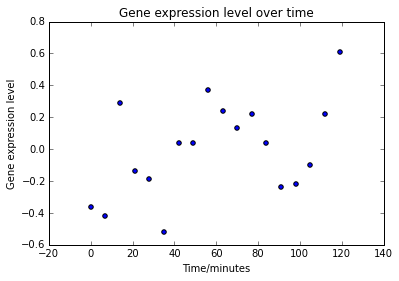

In [31]:
time = np.arange(0,120,7)
print time
print len(time)
print data[0,:]

plt.scatter(time, data[0,:], label="One gene expression over time")
plt.xlabel('Time/minutes')
plt.ylabel('Gene expression level')
plt.title('Gene expression level over time')

This plot shows us all the data points, but is a little bit hard to look at. Let's make a line plot, connecting the dots -- this makes the temporal development clearer.

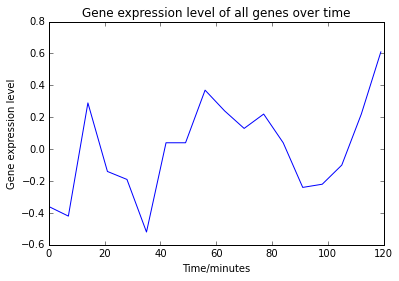

In [32]:
plt.plot(time, data[0,:], label="One gene expression over time")
plt.xlabel('Time/minutes')
plt.ylabel('Gene expression level')
plt.title('Gene expression level over time')

This was just one gene; we have $800$! Let's plot *all* the data points together

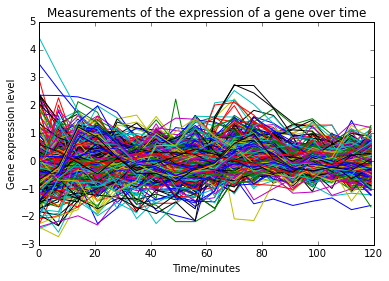

In [43]:
for i in range (0,799):
    plt.plot(time, data[i,:])
    
plt.xlabel('Time/minutes')
plt.ylabel('Gene expression level')
plt.title('Gene expression level of all genes over time')

Can you conclude anything from this plot? Not really?

In the Spellman paper, the genes are grouped into 5 different groups. These groups are stored in the file spellman_groups.txt. Let's open and look at the file:

In [30]:
group = np.loadtxt('datasets/spellman_groups.txt')

Next, let's pick out those genes that belong to each of the five groups

In [49]:
extract = np.where(group == 1) 
ones = extract[0] #makes it into an array so it loops through for plotting
extract = np.where(group == 2) 
twos = extract[0]
extract = np.where(group == 3) 
threes = extract[0]
extract = np.where(group == 4) 
fours = extract[0]
extract = np.where(group == 5) 
fives = extract[0]

Now, we plot those genes belonging to the first group

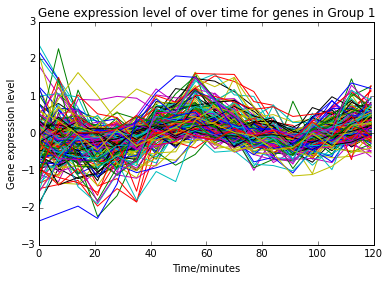

In [50]:
for i in range (0, len(ones)):
    plt.plot(time, data[ones[i],:])
    #selects each row in data that corresponds to occurence of 1 in groups i.e. group 1
    plt.xlabel('Time/minutes')
    plt.ylabel('Gene expression level')
    plt.title('Gene expression level of over time for genes in Group 1')

And the same for the other four groups! What do you see?

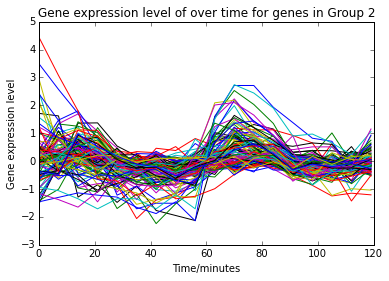

In [51]:
for i in range (0, len(twos)):
    plt.plot(time, data[twos[i],:])
    #selects each row in data that corresponds to occurence of 1 in groups i.e. group 1
    plt.xlabel('Time/minutes')
    plt.ylabel('Gene expression level')
    plt.title('Gene expression level of over time for genes in Group 2')

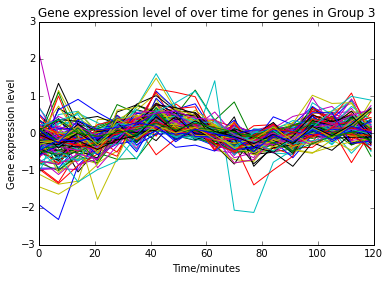

In [52]:
for i in range (0, len(threes)):
    plt.plot(time, data[threes[i],:])
    #selects each row in data that corresponds to occurence of 1 in groups i.e. group 1
    plt.xlabel('Time/minutes')
    plt.ylabel('Gene expression level')
    plt.title('Gene expression level of over time for genes in Group 3')

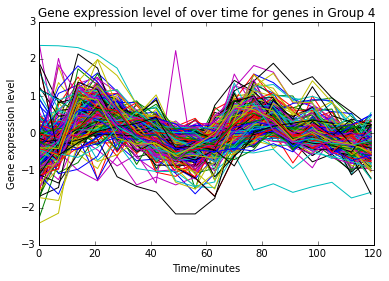

In [53]:
for i in range (0, len(fours)):
    plt.plot(time, data[fours[i],:])
    #selects each row in data that corresponds to occurence of 1 in groups i.e. group 1
    plt.xlabel('Time/minutes')
    plt.ylabel('Gene expression level')
    plt.title('Gene expression level of over time for genes in Group 4')

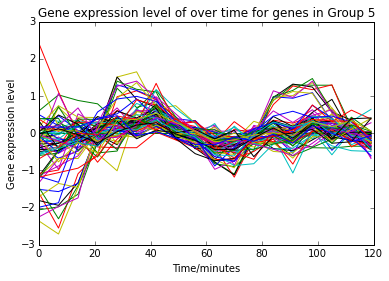

In [54]:
for i in range (0, len(fives)):
    plt.plot(time, data[fives[i],:])
    #selects each row in data that corresponds to occurence of 1 in groups i.e. group 1
    plt.xlabel('Time/minutes')
    plt.ylabel('Gene expression level')
    plt.title('Gene expression level of over time for genes in Group 5')

Your next exercise is to compute an average signal for every group, and plot the average signal in red on top of the group elements (genes) in blue. This time, let's write better code and handle the five cases in a loop.

Looping over the group index i, we are going to use plt.figure(i) to open a new figure for each group.

Note that the range(1,6) command returns integers, one by one, starting at 1 and ending at the last integer *less than* 6

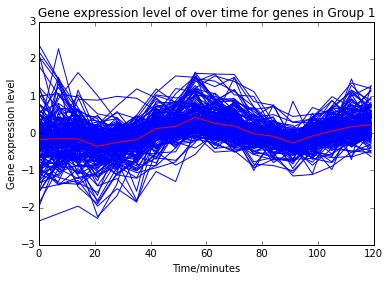

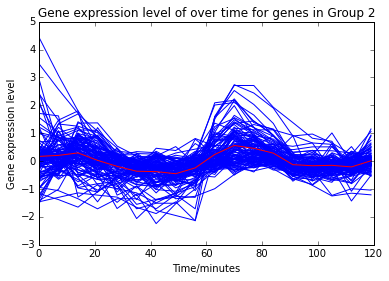

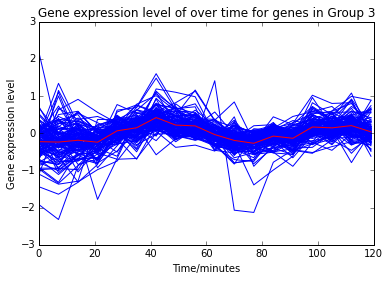

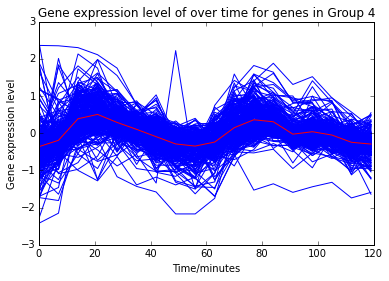

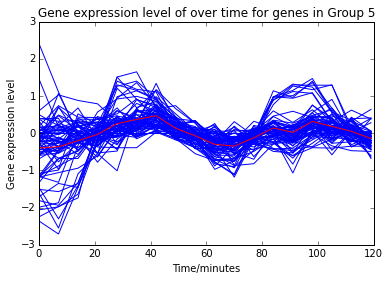

In [66]:
for i in range(1,6):
    extract = np.where(group == i) 
    groups = extract[0]
    mean = np.mean(data[groups,:],0) #2nd argument makes it into an array
    plt.figure(i)
    
    for j in range (0, len(groups)):
        plt.plot(time, data[groups[j],:], color="blue")
    #selects each row in data that corresponds to occurence of 1 in groups i.e. group 1
    plt.plot(time, mean, color='red')
    plt.xlabel('Time/minutes')
    plt.ylabel('Gene expression level')
    plt.title('Gene expression level of over time for genes in Group '+str(i))

Next, we are going to work with a temperature dataset, which contains a series of temperature measurements made at different time points of the day throughout a year, in Aalborg and Copenhagen, respectively. Please read the file 'tempdata.csv' and plot the two time series together:

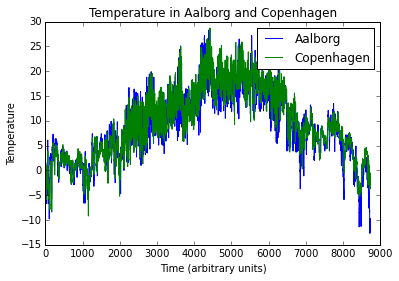

In [78]:
with open('datasets/tempdata.csv', 'rb') as f:
    reader = csv.reader(f, delimiter=',')
    x=list(reader)
    data_matrix = np.array(x).astype('float')
    Aalborg = data_matrix[:,0]
    Copenhagen = data_matrix[:,1]

#use np.linspace to create a specified number of evenly spaced points 
time = np.linspace(0,(len(Aalborg)-1),len(Aalborg))
plt.plot(time, Aalborg, label = 'Aalborg')
plt.plot(time, Copenhagen, label = 'Copenhagen')
plt.title('Temperature in Aalborg and Copenhagen')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Temperature')
plt.legend()

Do you think the temperature is generally warmer in Copenhagen? Let's make a boxplot to check it out.

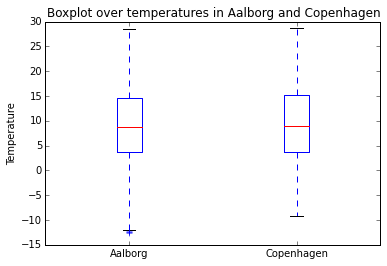

In [79]:
labels = ['Aalborg', 'Copenhagen']
plt.boxplot(data_matrix, labels=labels)
plt.title('Boxplot over temperatures in Aalborg and Copenhagen')
plt.ylabel('Temperature')

The red line in the box plot shows the median temperature, the borders of the blue box show the first and third quartiles, and the whiskers represent the range of the data. Based on the boxplot, the temperature does not seem much different in the two cities. Let's look at a different way to illustrate samples from a distribution: Histograms.

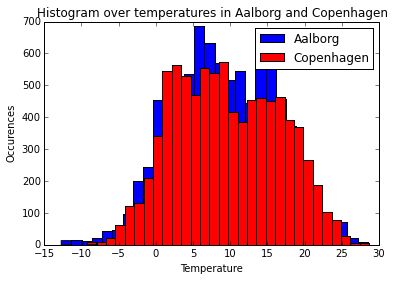

In [82]:
plt.hist(Aalborg, 30, label='Aalborg')
plt.xlabel('Temperature')
plt.ylabel('Number of measurements')
plt.title('Histogram over temperatures in Aalborg')

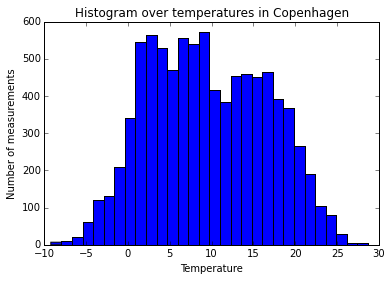

In [83]:
plt.hist(Copenhagen, 30, label='Copenhagen')
plt.xlabel('Temperature')
plt.ylabel('Number of measurements')
plt.title('Histogram over temperatures in Copenhagen')

A *histogram* discretizes the measured variable into *bins*, counts how many measurements fall into each bin, and plots these counts as a bar plot.